In [397]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Se lee el csv del covid

In [416]:
url = 'https://raw.githubusercontent.com/Dr-Carlos-Villasenor/ReconocimientoPatrones/master/Datasets/owid-covid-data.csv'
df = pd.read_csv(url,parse_dates=[0])

Se revisa el csv

In [417]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,31/12/2019,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,01/01/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,02/01/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,03/01/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,04/01/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


Se extraen datos solo de México

In [418]:
df = df[df.iso_code =='MEX']
# Se resetea el index
df.reset_index(inplace = True, drop = True)

Se revisan los datos de México

In [419]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,MEX,North America,Mexico,31/12/2019,0.0,0.0,0.0,0.0,0.0,0.0,...,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05
1,MEX,North America,Mexico,01/01/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05
2,MEX,North America,Mexico,02/01/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05
3,MEX,North America,Mexico,03/01/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05
4,MEX,North America,Mexico,04/01/2020,0.0,0.0,0.0,0.0,0.0,0.0,...,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05


En el primer momento que hay un caso se empieza a contar, no se debe contar desde el principio porque hay muchos dias con 0 casos

In [420]:
n = 0
while True:
    if df.new_cases.values[n] > 0:
        break
    else:
        n+=1

df = df[n:]

Se grafican los nuevos casos

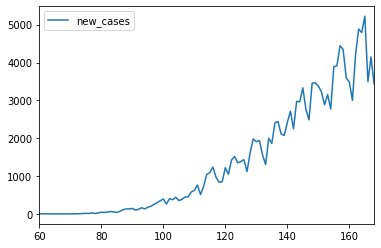

In [421]:
df.plot(y='new_cases')

## Autoregresión

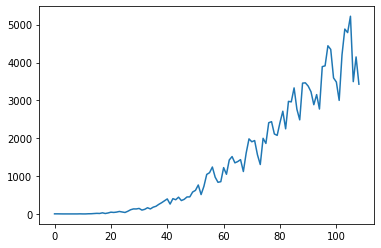

In [422]:
x = np.asanyarray(df[['new_cases']])
plt.plot(x)

Vemos como se relaciona un dia con el anterior (Se compara el dia x con el dia x-1, para ver que tan correlacionados estan)

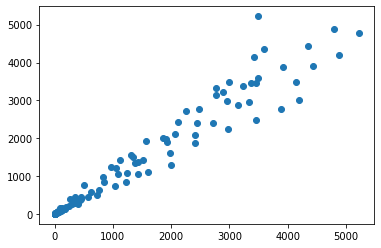

In [423]:
plt.scatter(x[1:], x[:-1])

Se calcula la correlación del dia actual con el anterior (dia x contra dia x-1)

In [427]:
np.corrcoef(x[1:].T, x[:-1].T)

array([[1.        , 0.97053614],
       [0.97053614, 1.        ]])

Ahora se observa como se realciona un día con otro solo cambiando el retardo (Delay es el numero de dias anteriores con el que se compara, dia x contra dia x-2)

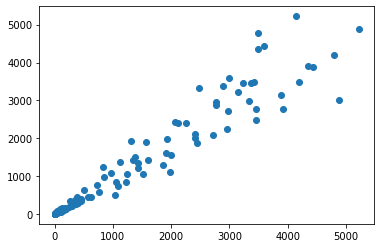

In [430]:
delay = 2
plt.scatter(x[delay:], x[:-delay])

Se calcula la correlacion con los nuevos dias de retraso

In [431]:
np.corrcoef(x[delay:].T, x[:-delay].T)

array([[1.        , 0.95830069],
       [0.95830069, 1.        ]])

Se grafica la correlación de la siguiente manera

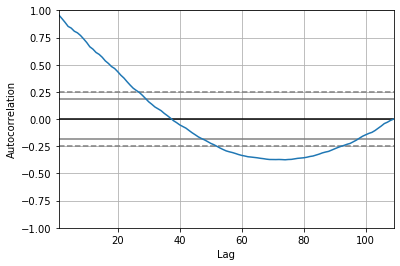

In [432]:
pd.plotting.autocorrelation_plot(df['new_cases'])

Se crea una tabla donde cada columna sea un dia de retraso con la columna anterior, hasta que el numero de delay sea igual al numero de columnas

In [433]:
df2 = pd.DataFrame(df['new_cases'])

delay = 15
for i in range(1, delay+1):
    df2 = pd.concat([df2, df['new_cases'].shift(-i)], axis = 1)
df2 = df2[:-delay]
df2


,new_cases,new_cases,new_cases,new_cases,new_cases,new_cases,new_cases,new_cases,new_cases,new_cases,new_cases,new_cases,new_cases,new_cases,new_cases,new_cases
60,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,10.0,15.0
61,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,10.0,15.0,12.0
62,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,10.0,15.0,12.0,29.0
63,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,10.0,15.0,12.0,29.0,11.0
64,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,10.0,15.0,12.0,29.0,11.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,3463.0,3377.0,3227.0,2885.0,3152.0,2771.0,3891.0,3912.0,4442.0,4346.0,3593.0,3484.0,2999.0,4199.0,4883.0,4790.0
150,3377.0,3227.0,2885.0,3152.0,2771.0,3891.0,3912.0,4442.0,4346.0,3593.0,3484.0,2999.0,4199.0,4883.0,4790.0,5222.0
151,3227.0,2885.0,3152.0,2771.0,3891.0,3912.0,4442.0,4346.0,3593.0,3484.0,2999.0,4199.0,4883.0,4790.0,5222.0,3494.0
152,2885.0,3152.0,2771.0,3891.0,3912.0,4442.0,4346.0,3593.0,3484.0,2999.0,4199.0,4883.0,4790.0,5222.0,3494.0,4147.0


Se seleccionan los datos

In [434]:
x = np.asanyarray(df2.iloc[:,:-1])
y = np.asanyarray(df2.iloc[:,-1])
print(x)
print(y)

[[2.000e+00 2.000e+00 1.000e+00 ... 4.000e+00 5.000e+00 1.000e+01]
 [2.000e+00 1.000e+00 0.000e+00 ... 5.000e+00 1.000e+01 1.500e+01]
 [1.000e+00 0.000e+00 0.000e+00 ... 1.000e+01 1.500e+01 1.200e+01]
 ...
 [3.227e+03 2.885e+03 3.152e+03 ... 4.883e+03 4.790e+03 5.222e+03]
 [2.885e+03 3.152e+03 2.771e+03 ... 4.790e+03 5.222e+03 3.494e+03]
 [3.152e+03 2.771e+03 3.891e+03 ... 5.222e+03 3.494e+03 4.147e+03]]
[  15.   12.   29.   11.   25.   46.   39.   48.   65.   51.   38.   70.
  110.  132.  131.  145.  101.  121.  163.  132.  178.  202.  253.  296.
  346.  396.  260.  403.  375.  442.  353.  385.  448.  450.  578.  622.
  764.  511.  729. 1043. 1089. 1239.  970.  835.  852. 1223. 1047. 1425.
 1515. 1349. 1383. 1434. 1120. 1609. 1982. 1906. 1938. 1562. 1305. 1997.
 1862. 2409. 2437. 2112. 2075. 2414. 2713. 2248. 2973. 2960. 3329. 2764.
 2485. 3455. 3463. 3377. 3227. 2885. 3152. 2771. 3891. 3912. 4442. 4346.
 3593. 3484. 2999. 4199. 4883. 4790. 5222. 3494. 4147. 3427.]


Se construye y se prueba el modelo, en este caso se tiene una regresion lineal normal y una ridge

In [435]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

model = LinearRegression()

model.fit(x_train, y_train)

model_ridge = Ridge(alpha = 1000000)
model_ridge.fit(x_train, y_train)
#model.fit(x,y)

print('Train linear:', model.score(x_train, y_train))
print('Test linear: ', model.score(x_test, y_test))
print('Total linear: ', model.score(x,y))

print('Train ridge: ', model_ridge.score(x_train, y_train))
print('Test ridge: ', model_ridge.score(x_test, y_test))
print('Total ridge: ', model_ridge.score(x,y))


Train linear: 0.9859610693418722
Test linear:  0.9371548403179966
Total linear:  0.977128597907632
Train ridge:  0.9838510757700205
Test ridge:  0.9511957810134363
Total ridge:  0.9782129868515181


Se toman los ultimos dias para hacer la preducción de coronas del 17 de Junio

In [436]:
last_days = df[-delay:].new_cases.values.reshape(1,-1)

In [437]:
last_days

array([[2771., 3891., 3912., 4442., 4346., 3593., 3484., 2999., 4199.,
        4883., 4790., 5222., 3494., 4147., 3427.]])

Se pruebna el modelo con regresion linear normal

In [414]:
model.predict(last_days)

array([4658.03593094])

Se prueba el modelo con ridge

In [415]:
model_ridge.predict(last_days)

array([4663.99177185])

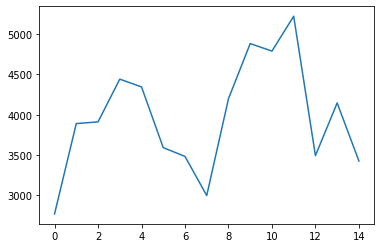

In [450]:
plt.plot(last_days[0])

Segun el articulo: https://www.milenio.com/politica/coronavirus-mexico-17-junio-noticias-covid-19 México reportó
### 4930 nuevos casos de coronavirus        

In [453]:

x[:-1]

array([[2.000e+00, 2.000e+00, 1.000e+00, ..., 4.000e+00, 5.000e+00,
        1.000e+01],
       [2.000e+00, 1.000e+00, 0.000e+00, ..., 5.000e+00, 1.000e+01,
        1.500e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+01, 1.500e+01,
        1.200e+01],
       ...,
       [3.377e+03, 3.227e+03, 2.885e+03, ..., 4.199e+03, 4.883e+03,
        4.790e+03],
       [3.227e+03, 2.885e+03, 3.152e+03, ..., 4.883e+03, 4.790e+03,
        5.222e+03],
       [2.885e+03, 3.152e+03, 2.771e+03, ..., 4.790e+03, 5.222e+03,
        3.494e+03]])

In [455]:

a = [1,2,3,4,5]

In [456]:
a[:-1]

[1, 2, 3, 4]